In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import dask.dataframe as dd
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.5f' %x)

In [2]:
#reading in data

In [3]:
twdf = dd.read_csv("out.tsv", sep=" ")

In [4]:
twdf.columns = ['First','Second','Meta']

In [5]:
twdf = twdf.drop(['Meta'], axis=1)

In [6]:
#checking number of entries of data

In [7]:
twdf.shape[0].compute()

1468365182

In [8]:
twdf.head()

,First,Second
0,1,2
1,1,3
2,1,4
3,1,5
4,1,6


In [9]:
#Checking number of unique values of Columns

In [10]:
Firstnuni = twdf['First'].nunique().compute()

In [11]:
Firstnuni

40103281

In [12]:
Secondnuni = twdf['Second'].nunique().compute()

In [13]:
Secondnuni

35689148

In [14]:
#Creating Dataframe for Following

In [15]:
counts1 = twdf.groupby('First').Second.count().compute()

In [16]:
counts1.head()

First
1    1001061
2    1031830
3       8808
4      14342
5        218
Name: Second, dtype: int64

In [17]:
counts1.describe()

count   40103281.00000
mean          36.61459
std         2466.02026
min            1.00000
25%            4.00000
50%            7.00000
75%           15.00000
max      2997469.00000
Name: Second, dtype: float64

In [18]:
#Creating Dataframe for Followers

In [19]:
counts2 = twdf.groupby('Second').count().compute()

In [20]:
counts2.head()

,First
Second,
1,586
2,243
3,106
4,275
5,273


In [21]:
counts2.describe()

,First
count,35689148.00000
mean,41.14318
std,382.82273
min,1.00000
25%,2.00000
50%,8.00000
75%,21.00000
max,770155.00000


In [22]:
#Labelling/Indexing/Logging Following DataFrame

In [23]:
counts1 = counts1.reset_index()

In [24]:
counts1.head()

,First,Second
0,1,1001061
1,2,1031830
2,3,8808
3,4,14342
4,5,218


In [25]:
counts1.columns = ['ID', 'Following'] 

In [26]:
counts1.head()

,ID,Following
0,1,1001061
1,2,1031830
2,3,8808
3,4,14342
4,5,218


In [27]:
counts1['FollowingLog'] = np.log(counts1['Following'])

In [28]:
counts1.head()

,ID,Following,FollowingLog
0,1,1001061,13.81657
1,2,1031830,13.84684
2,3,8808,9.08342
3,4,14342,9.57095
4,5,218,5.38450


In [29]:
#Plotting Distribution for Following Data

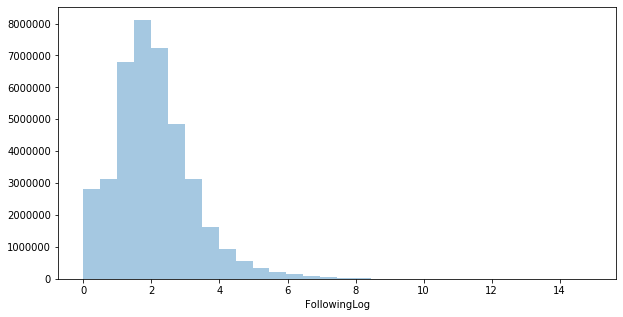

In [30]:
plt.figure(figsize=(10, 5))
sns.distplot(counts1["FollowingLog"], bins=30, kde=False)

In [31]:
#Plotting ECDF for Following Data

<function matplotlib.pyplot.show(*args, **kw)>

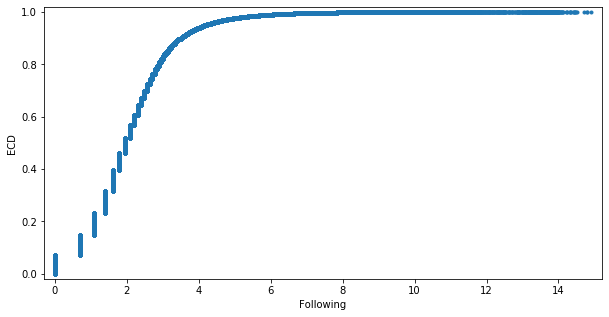

In [32]:
plt.figure(figsize=(10, 5))
x = np.sort(counts1['FollowingLog'])
y = np.arange(1, len(x)+1) /len(x)
plt.plot(x, y, marker='.',linestyle = 'none')
plt.xlabel('Following')
plt.ylabel('ECD')
plt.margins(0.02)
plt.show

In [33]:
#Labelling/Indexing/Logging Follower DataFrame

In [34]:
counts2 = counts2.reset_index()

In [35]:
counts2.head()

,Second,First
0,1,586
1,2,243
2,3,106
3,4,275
4,5,273


In [36]:
counts2.columns = ['ID', 'Followers'] 

In [37]:
counts2.head()

,ID,Followers
0,1,586
1,2,243
2,3,106
3,4,275
4,5,273


In [38]:
counts2['FollowersLog'] = np.log(counts2['Followers'])

In [39]:
counts2.head()

,ID,Followers,FollowersLog
0,1,586,6.37332
1,2,243,5.49306
2,3,106,4.66344
3,4,275,5.61677
4,5,273,5.60947


In [40]:
#Plotting Distribution for Follower Data

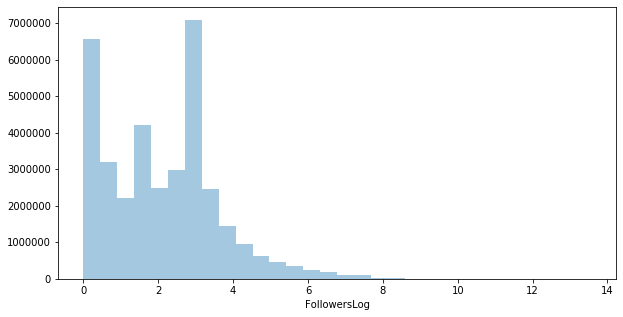

In [41]:
plt.figure(figsize=(10, 5))
sns.distplot(counts2["FollowersLog"], bins=30, kde=False)

In [42]:
#Plotting ECDF for Follower Data

<function matplotlib.pyplot.show(*args, **kw)>

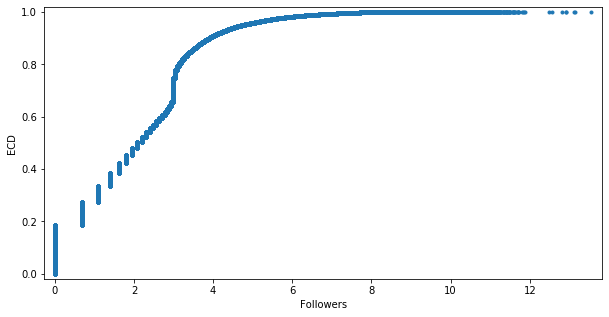

In [43]:
plt.figure(figsize=(10, 5))
a = np.sort(counts2['FollowersLog'])
b = np.arange(1, len(a)+1) /len(a)
plt.plot(a, b, marker='.',linestyle = 'none')
plt.xlabel('Followers')
plt.ylabel('ECD')
plt.margins(0.02)
plt.show

In [44]:
#Combined Distribution Plots for Following and Follower

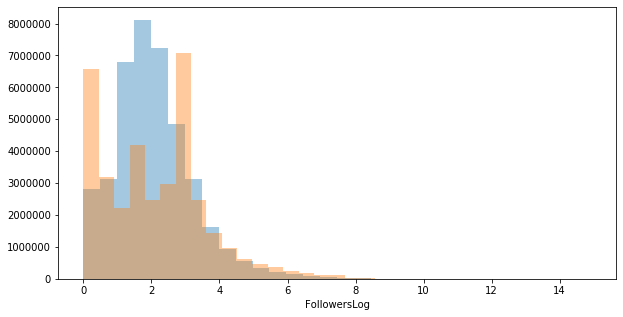

In [45]:
plt.figure(figsize=(10, 5))
sns.distplot(counts1['FollowingLog'], bins = 30, kde = False)
sns.distplot(counts2['FollowersLog'], bins = 30, kde = False)

In [46]:
#Combined ECDF Plots for Following and Follower

<function matplotlib.pyplot.show(*args, **kw)>

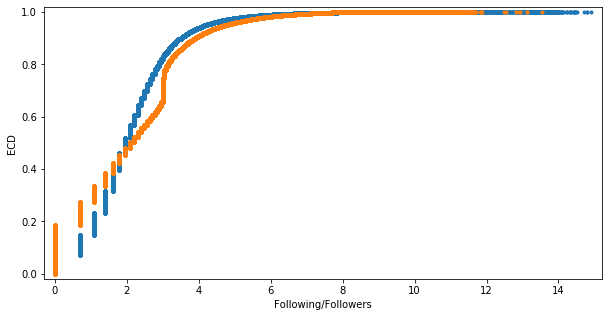

In [47]:
plt.figure(figsize=(10, 5))
x1 = np.sort(counts1['FollowingLog'])
x2 = np.sort(counts2['FollowersLog'])
y1 = np.arange(1, len(x1)+1) /len(x1)
y2 = np.arange(1, len(x2)+1) /len(x2)
plt.plot(x1, y1, marker='.',linestyle = 'none')
plt.plot(x2, y2, marker='.',linestyle = 'none')
plt.xlabel('Following/Followers')
plt.ylabel('ECD')
plt.margins(0.02)
plt.show

In [48]:
#User that is following the most number of people

In [49]:
counts1[counts1.Following == counts1.Following.max()]

,ID,Following,FollowingLog
4358619,1037948,2997469,14.91328


In [50]:
#Users that are following the least number of people

In [51]:
counts1[counts1.Following == counts1.Following.min()]

,ID,Following,FollowingLog
108,1001064,1,0.00000
141,1762182,1,0.00000
210,2577347,1,0.00000
233,2580190,1,0.00000
242,2580773,1,0.00000
...,...,...,...
40103276,41652226,1,0.00000
40103277,41652227,1,0.00000
40103278,41652228,1,0.00000
40103279,41652229,1,0.00000


In [52]:
#User that is followed by the most number of people

In [53]:
counts2[counts2.Followers == counts2.Followers.max()]

,ID,Followers,FollowersLog
1652,1653,770155,13.55435


In [54]:
#Users that have the least number of followers

In [55]:
counts2[counts2.Followers == counts2.Followers.min()]

,ID,Followers,FollowersLog
275,276,1,0.00000
306,307,1,0.00000
331,332,1,0.00000
599,600,1,0.00000
1048,1049,1,0.00000
...,...,...,...
35689138,41652099,1,0.00000
35689140,41652103,1,0.00000
35689143,41652132,1,0.00000
35689146,41652164,1,0.00000


In [56]:
#number of users following user id 1037948

In [57]:
counts2.loc[counts2['ID'] == 1037948]

,ID,Followers,FollowersLog
1037947,1037948,183,5.20949


In [58]:
#number of users followed by user id 1653

In [59]:
counts1.loc[counts1['ID'] == 1653]

,ID,Following,FollowingLog
38991,1653,1882889,14.44832


In [60]:
#number of uses with no followers

In [61]:
Firstnuni - Secondnuni

4414133